# Description of the project "Defining of a promising tariff for a telecom company": 

The company implements two tariff plans Smart and Ultra. To optimize the advertising budget of the company, it is necessary to determine which of the tariff plans is more profitable for the company.
To solve this problem, it is necessary to analyze the available data on the behavior of 500 customers for 2018, taking into account information about the specifics of tariff plans.

Specifics of tariff plans:
1) Tariff "Smart"
Monthly fee: 550 rubles
Included: 500 minutes of conversation, 50 messages and 15 GB of Internet traffic
The cost of services in excess of the tariff package:
a minute of conversation: 3 rubles
message: 3 rubles
1 GB of Internet traffic: 200 rubles

2) Tariff "Ultra"
Monthly fee: 1950 rubles
Included: 3000 minutes of conversation, 1000 messages and 30 GB of Internet traffic
The cost of services in excess of the tariff package:
a minute of conversation: 1 ruble
message: 1 ruble
1 GB of Internet traffic: 150 rubles


Time is always subject to rounding from seconds to minutes, and megabytes to gigabytes. Each call is rounded separately: even if it lasted only 1 second, it will be counted as 1 minute.
For web traffic, individual sessions are not counted. Instead, the total amount for the month is rounded up. If a subscriber uses 1025 megabytes this month, they will be charged for 2 gigabytes. Please accept that unused calls, SMS, Internet for the previous month will not be transferred to the next month.

# Task details:

To solve this task, we need to perform the following steps:

1) study the data and their specifics;

2) carry out their preliminary processing so that the results of the analysis reflect real patterns, and not distorted due to the presence of inaccuracies or errors in the data;

3) conducting research data analysis;

4) formation and verification of hypotheses;

5) the design of the general conclusion of the study.

## Study the available data:

Open the provided tables with data:

In [65]:
import pandas as pd
calls_df = pd.read_csv('/Users/a1/Desktop/data_folder/telephone_data/calls.csv')
internet_df = pd.read_csv('/Users/a1/Desktop/data_folder/telephone_data/internet.csv')
messages_df = pd.read_csv('/Users/a1/Desktop/data_folder/telephone_data/messages.csv')
tariffs_df = pd.read_csv('/Users/a1/Desktop/data_folder/telephone_data/tariffs.csv')
users_df = pd.read_csv('/Users/a1/Desktop/data_folder/telephone_data/users.csv')

1) Study the data from calls_df:
* id — unique call number
* call_date — date of the call
* duration — the duration of the call in minutes
* user_id — ID of the user who made the call

In [66]:
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [67]:
calls_df.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


Based on the explanations to the call_df table, we see that the duration column reflects the duration of the call in minutes. Now this data is represented by the float type.

In [68]:
calls_df.duplicated().sum()

0

In [69]:
calls_df.isna().sum()

id           0
call_date    0
duration     0
user_id      0
dtype: int64

There are no explicit duplicates and nan values in the calls_df table.

In [70]:
calls_df['user_id'].value_counts()

1377    1760
1168    1692
1375    1560
1453    1440
1196    1240
        ... 
1397      33
1442      28
1373      24
1016      20
1257      14
Name: user_id, Length: 492, dtype: int64

The calls_df table contains data on calls from 492 clients, not 500.

### Conclusion of the data study of table calls_df.
The initial analysis of the call_df table data showed that there are no gaps, nan values and duplicates in it. At the same time, the data contains information about 492 customers, not about 500. The values of the duration column are specified in the float type, they must be converted to the int type and adjusted upwards to minutes. We also need to change the date type.

2) Study the data from the internet_df table:
* id — unique session number
* mb_used — the amount of Internet traffic spent per session (in megabytes)
* session_date — date of the internet session
* user_id — user ID

In [71]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [72]:
internet_df.head(10)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


We see the unnamed: 0 column that we don't need, formed as a result of saving data.

In [73]:
internet_df.duplicated().sum()

0

In [74]:
internet_df.isna().sum()

Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

There are no explicit duplicates and nan values in the internet_df table.

In [75]:
internet_df['user_id'].value_counts()

1496    834
1227    812
1204    789
1240    764
1251    759
       ... 
1151     35
1467     27
1343     26
1192     22
1399      8
Name: user_id, Length: 497, dtype: int64

The internet_df table contains data on the Internet usage of 497 clients, not 500.

### The conclusion of data study of the internet_df table.
The initial analysis of the data of the internet_df table showed that there are no omissions, nan values and duplicates in it. At the same time, the data contains information about 497 clients, not about 500. The table contains an unnamed: 0 unnecessary column formed as a result of saving data, it will need to be deleted. The values of the mb_used column are specified in the float type, we will convert them later, since their rounding also depends on the resolution of the month. We also need to change the date type.

3) Study the data from the messages_df table:
* id — unique message number
* message_date — date of the message
* user_id — ID of the user who sent the message

In [76]:
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [77]:
messages_df.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [78]:
messages_df.duplicated().sum()

0

In [79]:
messages_df.isna().sum()

id              0
message_date    0
user_id         0
dtype: int64

There are no explicit duplicates and nan values in the messages_df table.

In [80]:
messages_df['user_id'].value_counts()

1277    1463
1089    1408
1231    1384
1385    1380
1356    1224
        ... 
1389       6
1279       5
1074       3
1159       2
1141       1
Name: user_id, Length: 426, dtype: int64

The messages_df table contains data about 426 clients' messages, not 500.

### The conclusion of data study of the  table messages_df.
The initial analysis of the messages_df table data showed that there are no omissions, nan values and duplicates in it. At the same time, the data contains information about 426 customers, not about 500. We also need to change the date type.

4) Study the data from the tariffs_df table:
* tariff_name — name of the tariff
* rub_monthly_fee — monthly subscription fee in rubles
* minutes_included — the number of minutes of conversation per month included in the subscription fee
* messages_included — the number of messages per month included in the subscription fee
* mb_per_month_included — the amount of Internet traffic included in the subscription fee (in megabytes)
* rub_per_minute — the cost of a minute of conversation over the tariff package (for example, if the tariff has 100 minutes of conversation per month, then a fee will be charged from 101 minutes)
* rub_per_message — the cost of sending a message over the tariff package
* rub_per_gb — the cost of an additional gigabyte of Internet traffic over the tariff package (1 gigabyte = 1024 megabytes)

In [81]:
tariffs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [82]:
tariffs_df.head(10)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


### The conclusion of data study of the table tariffs_df.
The primary data analysis of the tariffs_df table contains general data on tariffs. Next, we need to convert the megabytes included in the tariff into gigabytes.

5) Study the data from the users_df table:

In [83]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [84]:
users_df.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


Determine the proportion of nan values:

In [85]:
volume_nan = 38 / 500
print("The percentage of missing values in the column churn_date: {:.1%}".format(volume_nan))

The percentage of missing values in the column churn_date: 7.6%


At this stage, we cannot neglect this data, so we leave them.

In [86]:
users_df.duplicated().sum()

0

There are no explicit duplicates in the users_df table.

In [87]:
users_df['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

In [88]:
users_df['tariff'].unique()

array(['ultra', 'smart'], dtype=object)

There are no implicit duplicates in the users_df table in the columns city, tariff.

In [89]:
users_df['user_id'].duplicated().sum()

0

### The conclusion of data study of the table users_df.
The initial analysis of the users_df table data showed that there are no duplicates in it. At the same time, the data contains nan values in the churn_rate column, which is 7.6% of the data in the column. The char_date column contains information about the date of termination of use of the tariff, if the value is missing, then the client is still using the tariff on the date of formation of the table. Let's leave this data. However, we need to change the date type and fill in the gaps. We also need to change the name of the tariff column to tariff_name for unification.

## Preparing data for analysis

### Preprocessing of calls_df table data:

#### Change the data to the correct time format and add a column with the month of the call:

In [90]:
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'], format='%Y-%m-%d')

In [91]:
calls_df['month'] = calls_df['call_date'].dt.month
calls_df.head(10)

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12
5,1000_5,2018-11-02,0.00,1000,11
6,1000_6,2018-10-18,0.00,1000,10
7,1000_7,2018-08-22,18.31,1000,8
8,1000_8,2018-09-15,18.44,1000,9
9,1000_9,2018-08-15,0.00,1000,8


#### Correcting data in the column "duration":
Based on the explanations to the call_df table, we see that the "duration" column reflects the duration of the call in minutes. Now this data is represented by the float type. Since to account for the cost of the tariff, the duration of calls is always rounded from a second to a minute, we will bring the data to the int type for the convenience of research.

In [92]:
import numpy as np
calls_df['duration'] = calls_df['duration'].apply(np.ceil).astype(int)
calls_df.head(10)

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12
5,1000_5,2018-11-02,0,1000,11
6,1000_6,2018-10-18,0,1000,10
7,1000_7,2018-08-22,19,1000,8
8,1000_8,2018-09-15,19,1000,9
9,1000_9,2018-08-15,0,1000,8


### Preprocessing of the internet_df table data:

#### Change the data to the correct time format and add a column with the month of the session:

In [93]:
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'], format='%Y-%m-%d')
internet_df['month'] = internet_df['session_date'].dt.month
internet_df.head(10)

,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,112.95,2018-11-25,1000,11
1,1,1000_1,1052.81,2018-09-07,1000,9
2,2,1000_2,1197.26,2018-06-25,1000,6
3,3,1000_3,550.27,2018-08-22,1000,8
4,4,1000_4,302.56,2018-09-24,1000,9
5,5,1000_5,399.97,2018-10-02,1000,10
6,6,1000_6,540.08,2018-09-07,1000,9
7,7,1000_7,415.70,2018-07-11,1000,7
8,8,1000_8,505.40,2018-10-08,1000,10
9,9,1000_9,345.54,2018-09-03,1000,9


#### Delete the column Unnamed: 0

In [94]:
internet_df.drop(columns = ['Unnamed: 0'],axis = 1, inplace=True)
internet_df.head(10)

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9
5,1000_5,399.97,2018-10-02,1000,10
6,1000_6,540.08,2018-09-07,1000,9
7,1000_7,415.70,2018-07-11,1000,7
8,1000_8,505.40,2018-10-08,1000,10
9,1000_9,345.54,2018-09-03,1000,9


### Preprocessing of messages_d table data:

#### Change the data to the correct time format and add a column with the month of the message:

In [95]:
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'], format='%Y-%m-%d')
messages_df['month'] = messages_df['message_date'].dt.month
messages_df.head(10)

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12
5,1000_5,2018-06-20,1000,6
6,1000_6,2018-11-19,1000,11
7,1000_7,2018-10-29,1000,10
8,1000_8,2018-06-25,1000,6
9,1000_9,2018-12-18,1000,12


### Preprocessing of users_df table data:

#### Change the name of the column tariff to tariff_name:

In [96]:
users_df.rename(columns = {'tariff' : 'tariff_name'}, inplace = True)
users_df.head(25)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff_name
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


#### Change the data to the correct time format, fill in the gaps in the churn_month column and add a column with the month of registration and the month of termination of the tariff:

In [97]:
#replace the gaps in the churn_rate column with the last month of 2018:
users_df['churn_date'] = users_df['churn_date'].fillna('2018-12-31')
import datetime
users_df['churn_date'] = pd.to_datetime(users_df['churn_date'], format='%Y-%m-%d')
users_df['churn_month'] = users_df['churn_date'].dt.month
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'], format='%Y-%m-%d')
users_df['reg_month'] = users_df['reg_date'].dt.month
users_df.head(25)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff_name,churn_month,reg_month
0,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,12,5
1,1001,41,2018-12-31,Москва,Иван,Ежов,2018-11-01,smart,12,11
2,1002,59,2018-12-31,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,12,6
3,1003,23,2018-12-31,Москва,Белла,Белякова,2018-08-17,ultra,12,8
4,1004,68,2018-12-31,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,12,5
5,1005,67,2018-12-31,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,12,1
6,1006,21,2018-12-31,Ульяновск,Леонид,Ермолаев,2018-02-26,smart,12,2
7,1007,65,2018-12-31,Москва,Юна,Березина,2018-04-19,smart,12,4
8,1008,63,2018-12-31,Челябинск,Рустэм,Пономарёв,2018-12-19,smart,12,12
9,1009,24,2018-12-31,Пермь,Василиса,Блинова,2018-03-22,smart,12,3


### Preprocessing of tariffs_df table data:

In [98]:
tariffs_df['mb_per_month_included'] = tariffs_df['mb_per_month_included'] / 1024
tariffs_df.rename(columns = {'mb_per_month_included' : 'gb_per_month_included'}, inplace = True)
tariffs_df

,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15.0,500,550,200,3,3,smart
1,1000,30.0,3000,1950,150,1,1,ultra


### Determine the number of calls made and minutes of conversation spent by month for each user:

In [99]:
calls_pivot = calls_df.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['count', 'sum'])
calls_pivot

count      sum
              duration duration
user_id month                  
1000    5           22      159
        6           43      172
        7           47      340
        8           52      408
        9           58      466
...                ...      ...
1498    10          41      247
1499    9            9       70
        10          68      449
        11          74      612
        12          69      492

[3174 rows x 2 columns]

Having formed a pivot table, we received information about the number of calls in the "count duration" column and their duration for each client divided by months.

Converting the dataset for further use:

In [100]:
calls_pivot.columns = calls_pivot.columns.map('_'.join)
calls_pivot.reset_index(inplace=True)
calls_pivot

,user_id,month,count_duration,sum_duration
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466
...,...,...,...,...
3169,1498,10,41,247
3170,1499,9,9,70
3171,1499,10,68,449
3172,1499,11,74,612


In [101]:
calls_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   user_id         3174 non-null   int64
 1   month           3174 non-null   int64
 2   count_duration  3174 non-null   int64
 3   sum_duration    3174 non-null   int64
dtypes: int64(4)
memory usage: 99.3 KB


In [102]:
calls_pivot.rename(columns = {'count_duration' : 'calls_amount','sum_duration':'min_used'}, inplace = True)
calls_pivot

,user_id,month,calls_amount,min_used
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466
...,...,...,...,...
3169,1498,10,41,247
3170,1499,9,9,70
3171,1499,10,68,449
3172,1499,11,74,612


### Determine the number of messages sent by month for each user:

In [103]:
messages_pivot = messages_df.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count')
messages_pivot

id
user_id month    
1000    5      22
        6      60
        7      75
        8      81
        9      57
...            ..
1498    10     42
1499    9      11
        10     48
        11     59
        12     66

[2717 rows x 1 columns]

In [104]:
messages_pivot.rename(columns = {'id' : 'mes_per_month'}, inplace = True)
messages_pivot

mes_per_month
user_id month               
1000    5                 22
        6                 60
        7                 75
        8                 81
        9                 57
...                      ...
1498    10                42
1499    9                 11
        10                48
        11                59
        12                66

[2717 rows x 1 columns]

Having formed a pivot table, we received information about the number of messages in the "ms_per_month" column for each client, divided by months.

Converting the dataset for further use:

In [105]:
messages_pivot.reset_index(inplace=True)
messages_pivot

,user_id,month,mes_per_month
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


### Determine the amount of Internet traffic consumed by month for each user:

In [106]:
internet_df

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9
...,...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499,10
149392,1499_153,490.13,2018-12-14,1499,12
149393,1499_154,0.00,2018-10-27,1499,10
149394,1499_155,1246.32,2018-11-26,1499,11


In [107]:
internet_pivot = internet_df.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum')
internet_pivot

mb_used
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91
...                 ...
1498    10     20579.36
1499    9       1845.75
        10     17788.51
        11     17963.31
        12     13055.58

[3203 rows x 1 columns]

Having formed a pivot table, we received information about the volume of the Internet in the "mb_used" column for each client, divided by months.

Convert the data in the mb_used column to gigabytes, taking into account the operator's rounding rules:

In [108]:
internet_pivot['mb_used'] = internet_pivot['mb_used'] / 1024
internet_pivot

mb_used
user_id month           
1000    5       2.200674
        6      22.689229
        7      13.675430
        8      13.726494
        9      14.227451
...                  ...
1498    10     20.097031
1499    9       1.802490
        10     17.371592
        11     17.542295
        12     12.749590

[3203 rows x 1 columns]

In [109]:
internet_pivot['mb_used'] = internet_pivot['mb_used'].apply(np.ceil).astype(int)
internet_pivot.rename(columns = {'mb_used' : 'gb_used'}, inplace = True)
internet_pivot

gb_used
user_id month         
1000    5            3
        6           23
        7           14
        8           14
        9           15
...                ...
1498    10          21
1499    9            2
        10          18
        11          18
        12          13

[3203 rows x 1 columns]

Prepare the dataset for further use:

In [110]:
internet_pivot.reset_index(inplace=True)
internet_pivot

,user_id,month,gb_used
0,1000,5,3
1,1000,6,23
2,1000,7,14
3,1000,8,14
4,1000,9,15
...,...,...,...
3198,1498,10,21
3199,1499,9,2
3200,1499,10,18
3201,1499,11,18


### Determine the monthly revenue from each user:

To do this, we will subtract the free limit from the total number of calls, messages and Internet traffic; multiply the rest by the value from the tariff plan and add the subscription fee corresponding to the tariff plan.

#### We will prepare a dataset with user data that is important for the task of determining the profitability of the tariff for the operator:

In [111]:
key_users_info = users_df[['user_id','city','tariff_name']]
key_users_info

,user_id,city,tariff_name
0,1000,Краснодар,ultra
1,1001,Москва,smart
2,1002,Стерлитамак,smart
3,1003,Москва,ultra
4,1004,Новокузнецк,ultra
...,...,...,...
495,1495,Иркутск,ultra
496,1496,Вологда,smart
497,1497,Челябинск,smart
498,1498,Владикавказ,smart


In [112]:
user_tariff_df = key_users_info.merge(tariffs_df, on='tariff_name', how='left')
user_tariff_df

,user_id,city,tariff_name,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,Краснодар,ultra,1000,30.0,3000,1950,150,1,1
1,1001,Москва,smart,50,15.0,500,550,200,3,3
2,1002,Стерлитамак,smart,50,15.0,500,550,200,3,3
3,1003,Москва,ultra,1000,30.0,3000,1950,150,1,1
4,1004,Новокузнецк,ultra,1000,30.0,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...
495,1495,Иркутск,ultra,1000,30.0,3000,1950,150,1,1
496,1496,Вологда,smart,50,15.0,500,550,200,3,3
497,1497,Челябинск,smart,50,15.0,500,550,200,3,3
498,1498,Владикавказ,smart,50,15.0,500,550,200,3,3


#### We will prepare a dataset that combines customer spending on calls, Internet traffic usage and sending messages:

In [113]:
user_activity = calls_pivot.merge(internet_pivot, on=['user_id','month'], how='outer')
user_activity = user_activity.merge(messages_pivot, on=['user_id','month'], how='outer')
user_activity

,user_id,month,calls_amount,min_used,gb_used,mes_per_month
0,1000,5,22.0,159.0,3.0,22.0
1,1000,6,43.0,172.0,23.0,60.0
2,1000,7,47.0,340.0,14.0,75.0
3,1000,8,52.0,408.0,14.0,81.0
4,1000,9,58.0,466.0,15.0,57.0
...,...,...,...,...,...,...
3209,1489,8,NaN,NaN,11.0,17.0
3210,1489,9,NaN,NaN,17.0,32.0
3211,1489,10,NaN,NaN,20.0,21.0
3212,1489,11,NaN,NaN,18.0,20.0


Let's combine the "user_activity" dataset with the "user_tariff_df" dataset so that it is possible to calculate revenue from the client:

In [114]:
total_revenue = user_activity.merge(user_tariff_df, on='user_id', how='left')
total_revenue

,user_id,month,calls_amount,min_used,gb_used,mes_per_month,city,tariff_name,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22.0,159.0,3.0,22.0,Краснодар,ultra,1000,30.0,3000,1950,150,1,1
1,1000,6,43.0,172.0,23.0,60.0,Краснодар,ultra,1000,30.0,3000,1950,150,1,1
2,1000,7,47.0,340.0,14.0,75.0,Краснодар,ultra,1000,30.0,3000,1950,150,1,1
3,1000,8,52.0,408.0,14.0,81.0,Краснодар,ultra,1000,30.0,3000,1950,150,1,1
4,1000,9,58.0,466.0,15.0,57.0,Краснодар,ultra,1000,30.0,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,NaN,NaN,11.0,17.0,Санкт-Петербург,smart,50,15.0,500,550,200,3,3
3210,1489,9,NaN,NaN,17.0,32.0,Санкт-Петербург,smart,50,15.0,500,550,200,3,3
3211,1489,10,NaN,NaN,20.0,21.0,Санкт-Петербург,smart,50,15.0,500,550,200,3,3
3212,1489,11,NaN,NaN,18.0,20.0,Санкт-Петербург,smart,50,15.0,500,550,200,3,3


#### Determine the monthly revenue from each user:

Since the operator's revenue per customer is formed based on the subscription fee (which we know) and additional payment for exceeding the amount of use of minutes, gigabytes or messages included in the tariff, we need to determine the amount of such excess.

In [115]:
def count_extra_min(row):
    if row['min_used'] - row['minutes_included'] <= 0:
        return 0
    elif row['min_used'] - row['minutes_included'] > 0:
        return row['min_used'] - row['minutes_included']

total_revenue['extra_min'] = total_revenue.apply(count_extra_min, axis = 1)
total_revenue['extra_min'].unique()
total_revenue['extra_min'] = total_revenue['extra_min'].fillna(0)
total_revenue['extra_min'].unique()

def count_extra_gb(row):
    if row['gb_used'] - row['gb_per_month_included'] <= 0:
        return 0
    elif row['gb_used'] - row['gb_per_month_included'] > 0:
        return row['gb_used'] - row['gb_per_month_included']

total_revenue['extra_gb'] = total_revenue.apply(count_extra_gb, axis = 1)
total_revenue['extra_gb'].unique()
total_revenue['extra_gb'] = total_revenue['extra_gb'].fillna(0)
total_revenue['extra_gb'].unique()

def count_extra_mes(row):
    if row['mes_per_month'] - row['messages_included'] <= 0:
        return 0
    elif row['mes_per_month'] - row['messages_included'] > 0:
        return row['mes_per_month'] - row['messages_included']

total_revenue['extra_mes'] = total_revenue.apply(count_extra_mes, axis = 1)
total_revenue
total_revenue['extra_mes'].unique()
total_revenue['extra_mes'] = total_revenue['extra_mes'].fillna(0)
total_revenue['extra_mes'].unique()
total_revenue

,user_id,month,calls_amount,min_used,gb_used,mes_per_month,city,tariff_name,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,extra_min,extra_gb,extra_mes
0,1000,5,22.0,159.0,3.0,22.0,Краснодар,ultra,1000,30.0,3000,1950,150,1,1,0.0,0.0,0.0
1,1000,6,43.0,172.0,23.0,60.0,Краснодар,ultra,1000,30.0,3000,1950,150,1,1,0.0,0.0,0.0
2,1000,7,47.0,340.0,14.0,75.0,Краснодар,ultra,1000,30.0,3000,1950,150,1,1,0.0,0.0,0.0
3,1000,8,52.0,408.0,14.0,81.0,Краснодар,ultra,1000,30.0,3000,1950,150,1,1,0.0,0.0,0.0
4,1000,9,58.0,466.0,15.0,57.0,Краснодар,ultra,1000,30.0,3000,1950,150,1,1,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,NaN,NaN,11.0,17.0,Санкт-Петербург,smart,50,15.0,500,550,200,3,3,0.0,0.0,0.0
3210,1489,9,NaN,NaN,17.0,32.0,Санкт-Петербург,smart,50,15.0,500,550,200,3,3,0.0,2.0,0.0
3211,1489,10,NaN,NaN,20.0,21.0,Санкт-Петербург,smart,50,15.0,500,550,200,3,3,0.0,5.0,0.0
3212,1489,11,NaN,NaN,18.0,20.0,Санкт-Петербург,smart,50,15.0,500,550,200,3,3,0.0,3.0,0.0


Determine the revenue from each customer of the tariff for the company:

In [116]:
total_revenue['revenue_from_user'] = total_revenue['extra_min'] * total_revenue['rub_per_minute'] + total_revenue['extra_gb'] * total_revenue['rub_per_gb'] + total_revenue['extra_mes'] * total_revenue['rub_per_message'] + total_revenue['rub_monthly_fee']
total_revenue

,user_id,month,calls_amount,min_used,gb_used,mes_per_month,city,tariff_name,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,extra_min,extra_gb,extra_mes,revenue_from_user
0,1000,5,22.0,159.0,3.0,22.0,Краснодар,ultra,1000,30.0,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
1,1000,6,43.0,172.0,23.0,60.0,Краснодар,ultra,1000,30.0,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
2,1000,7,47.0,340.0,14.0,75.0,Краснодар,ultra,1000,30.0,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
3,1000,8,52.0,408.0,14.0,81.0,Краснодар,ultra,1000,30.0,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
4,1000,9,58.0,466.0,15.0,57.0,Краснодар,ultra,1000,30.0,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,NaN,NaN,11.0,17.0,Санкт-Петербург,smart,50,15.0,500,550,200,3,3,0.0,0.0,0.0,550.0
3210,1489,9,NaN,NaN,17.0,32.0,Санкт-Петербург,smart,50,15.0,500,550,200,3,3,0.0,2.0,0.0,950.0
3211,1489,10,NaN,NaN,20.0,21.0,Санкт-Петербург,smart,50,15.0,500,550,200,3,3,0.0,5.0,0.0,1550.0
3212,1489,11,NaN,NaN,18.0,20.0,Санкт-Петербург,smart,50,15.0,500,550,200,3,3,0.0,3.0,0.0,1150.0


In [117]:
total_revenue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                3214 non-null   int64  
 1   month                  3214 non-null   int64  
 2   calls_amount           3174 non-null   float64
 3   min_used               3174 non-null   float64
 4   gb_used                3203 non-null   float64
 5   mes_per_month          2717 non-null   float64
 6   city                   3214 non-null   object 
 7   tariff_name            3214 non-null   object 
 8   messages_included      3214 non-null   int64  
 9   gb_per_month_included  3214 non-null   float64
 10  minutes_included       3214 non-null   int64  
 11  rub_monthly_fee        3214 non-null   int64  
 12  rub_per_gb             3214 non-null   int64  
 13  rub_per_message        3214 non-null   int64  
 14  rub_per_minute         3214 non-null   int64  
 15  extr

To investigate the behavior of customers in terms of their use of the operator's services we need to prepare a dataset for this:

In [118]:
user_expereance_df = total_revenue[['user_id','city','tariff_name','month', 'calls_amount','min_used','gb_used', 'mes_per_month','revenue_from_user']]
user_expereance_df

,user_id,city,tariff_name,month,calls_amount,min_used,gb_used,mes_per_month,revenue_from_user
0,1000,Краснодар,ultra,5,22.0,159.0,3.0,22.0,1950.0
1,1000,Краснодар,ultra,6,43.0,172.0,23.0,60.0,1950.0
2,1000,Краснодар,ultra,7,47.0,340.0,14.0,75.0,1950.0
3,1000,Краснодар,ultra,8,52.0,408.0,14.0,81.0,1950.0
4,1000,Краснодар,ultra,9,58.0,466.0,15.0,57.0,1950.0
...,...,...,...,...,...,...,...,...,...
3209,1489,Санкт-Петербург,smart,8,NaN,NaN,11.0,17.0,550.0
3210,1489,Санкт-Петербург,smart,9,NaN,NaN,17.0,32.0,950.0
3211,1489,Санкт-Петербург,smart,10,NaN,NaN,20.0,21.0,1550.0
3212,1489,Санкт-Петербург,smart,11,NaN,NaN,18.0,20.0,1150.0


## Analysis of the operator's clients behavior

Calculate the mean, variance and standard deviation for the columns min_used, mem_per_month, gb_used. Plot the histograms of the distribution.

In [119]:
import numpy as np
user_expereance_df.pivot_table(index = 'tariff_name', values = ['min_used','mes_per_month','gb_used','revenue_from_user'], aggfunc = ['median',"mean",'var','std'])

median                                                mean  \
            gb_used mes_per_month min_used revenue_from_user    gb_used   
tariff_name                                                               
smart          17.0          34.0    423.0            1023.0  16.336176   
ultra          19.0          51.0    528.0            1950.0  19.694359   

                                                               var  \
            mes_per_month    min_used revenue_from_user    gb_used   
tariff_name                                                          
smart           38.716441  419.062978       1289.973531  32.923756   
ultra           61.161006  545.451104       2070.152284  94.146734   

                                                                std  \
            mes_per_month      min_used revenue_from_user   gb_used   
tariff_name                                                           
smart          717.594201  35844.189551     669785.708006  5.737923   
ultra         2109.659183  94203.418396     141516.745079  9.702924   

                                                         
            mes_per_month    min_used revenue_from_user  
tariff_name                                              
smart           26.787949  189.325618        818.404367  
ultra           45.931026  306.925754        376.187114

<AxesSubplot:ylabel='Frequency'>

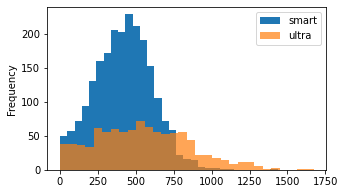

In [120]:
import matplotlib.pyplot as plt
user_expereance_df[user_expereance_df['tariff_name'] == 'smart']['min_used'].plot(kind = 'hist',bins = 30,label = 'smart', figsize = (5,3), legend=True)                                            
user_expereance_df[user_expereance_df['tariff_name'] == 'ultra']['min_used'].plot(kind = 'hist',bins = 30, alpha = 0.7, label = 'ultra', figsize = (5,3), legend=True)                                                   

<AxesSubplot:ylabel='Frequency'>

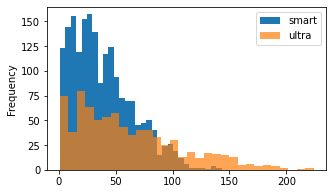

In [121]:
user_expereance_df[user_expereance_df['tariff_name'] == 'smart']['mes_per_month'].plot(kind = 'hist',bins = 30,label = 'smart', figsize = (5,3), legend=True)                              
user_expereance_df[user_expereance_df['tariff_name'] == 'ultra']['mes_per_month'].plot(kind = 'hist',bins = 30, alpha = 0.7, label = 'ultra', figsize = (5,3), legend=True)

<AxesSubplot:ylabel='Frequency'>

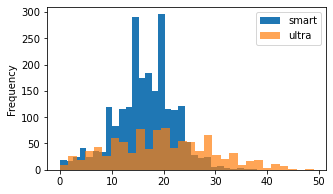

In [122]:
user_expereance_df[user_expereance_df['tariff_name'] == 'smart']['gb_used'].plot(kind = 'hist',bins = 30,label = 'smart', figsize = (5,3), legend=True)                              
user_expereance_df[user_expereance_df['tariff_name'] == 'ultra']['gb_used'].plot(kind = 'hist',bins = 30, alpha = 0.7, label = 'ultra', figsize = (5,3), legend=True)

Based on the graphs and the ratio of the location of the average to the median, it can be concluded that the data on the minutes used and the gigabytes used are skewed in the same direction: in the "smart" tariff to the left, in the "ultra" tariff to the right, while the data on the use of messages are skewed to the right regardless of the tariff. The average usage values of the operator's services for "ultra" customers are much lower than those offered by the operator, for "smart" customers these indicators are better (the volumes offered by the operator are closer to the actual consumed ones), but on average "smart" customers exceed the amount of Internet traffic usage included in the tariff.

## Hypothesis testing:

Hypotheses to be tested:
* the average revenue of users of the "Ultra" and "Smart" tariffs differ;
* the average revenue of users from Moscow differs from the revenue of users from other regions.

### Determine null and alternative hypotheses:

* Null hypothesis No. 1: the average revenue of users of the "Ultra" and "Smart" tariffs are equal.
* Alternative hypothesis No. 1: the average revenue of users of the "Ultra" and "Smart" tariffs differ.
* Null hypothesis No. 2: the average revenue of users from Moscow is equal to the revenue of users from other regions
* Alternative hypothesis No. 2: the average revenue of users from Moscow differs from the revenue of users from other regions.

### Testing hypotheses:

Test the first hypothesis:

In [123]:
from scipy import stats as st

ultra_revenue = user_expereance_df[user_expereance_df['tariff_name'] == 'ultra']['revenue_from_user']
smart_revenue = user_expereance_df[user_expereance_df['tariff_name'] == 'smart']['revenue_from_user']

alpha = .05
print('Average revenue of the "ultra" tariff:', user_expereance_df[user_expereance_df['tariff_name'] == 'ultra']['revenue_from_user'].mean())
print('Average revenue of the "smart" tariff:', user_expereance_df[user_expereance_df['tariff_name'] == 'smart']['revenue_from_user'].mean())

results = st.ttest_ind(
    ultra_revenue,
    smart_revenue) 

print("p-value:", results.pvalue)
if results.pvalue < alpha:
    print("Reject the null hypothesis")
else:
    print("It is not possible to reject the null hypothesis")

Average revenue of the "ultra" tariff: 2070.1522842639592
Average revenue of the "smart" tariff: 1289.9735307312696
p-value: 1.4229814360764067e-160
Reject the null hypothesis


Since it follows from the test results that the null hypothesis is incorrect, we can confirm that Hypothesis No. 1 "the average revenue of users of the Ultra and Smart tariffs differ" cannot be rejected.

Test the second hypothesis:

In [124]:
moscow_revenue = user_expereance_df[user_expereance_df['city'] == 'Москва']['revenue_from_user']
region_revenue = user_expereance_df[user_expereance_df['city'] != 'Москва']['revenue_from_user']

alpha = .05
print('Average revenue in Moscow:',user_expereance_df[user_expereance_df['city'] == 'Москва']['revenue_from_user'].mean())
print('Average revenue in other regions:',user_expereance_df[user_expereance_df['city'] != 'Москва']['revenue_from_user'].mean())

results = st.ttest_ind(
    moscow_revenue,
    region_revenue) 

print("p-value:", results.pvalue)
if results.pvalue < alpha:
    print("Reject the null hypothesis")
else:
    print("It is not possible to reject the null hypothesis")

Average revenue in Moscow: 1546.7135842880523
Average revenue in other regions: 1524.9362274298885
p-value: 0.5440152911670224
It is not possible to reject the null hypothesis


Since it follows from the test results that the null hypothesis cannot be rejected, we can conclude that, provided that the null hypothesis is true, there is a probability of its viability and we cannot reject it.

## Overall conclusion:

To prepare this analysis, data from 5 files was read and preliminary familiarization with the data was carried out, omissions were identified and processed, column names were changed to correct, incorrect data types and incorrect dataframe values were corrected. In general, it can be noted that the data were without significant anomalies. Next, the total duration of calls, the number of messages and the amount of Internet traffic consumed per month for each client were calculated. These data served as the basis for calculating the profit for each user.

In the research part of the data analysis, the user experience of customers was analyzed in terms of the volume of use of the operator's services.
* It was revealed that the parameters of the "smart" tariff are closer to the needs of customers, while the parameters of the "ultra" tariff significantly exceed the needs of customers. Perhaps the operator will be able to optimize the "ultra" tariff by reducing its parameters, potentially this may lead to a reduction in the cost of the "ultra" tariff.
* It was also revealed that the average revenue of the "ultra" tariff significantly exceeds the revenue of the "smart" tariff, so investing in the development of the "ultra" tariff will be the most useful.
* Two hypotheses were tested during the study. As a result, Hypothesis No. 1 "the average revenue of users of the Ultra and Smart tariffs differ" could not be rejected, and Hypothesis No. 2 "the average revenue of users from Moscow differs from the revenue of users from other regions" has a low probability of being realized, and the hypothesis "the average revenue of users from Moscow is equal to revenue users from other regions".